In [1]:
import numpy as np
import pandas as pd
# from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, make_scorer, roc_curve

In [2]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

%matplotlib inline

# Display full content
# pd.set_option('display.max_colwidth', -1)
# np.set_printoptions(threshold=sys.maxsize)

import sys
sys.path.append('..')

In [41]:
# Project libraries
%load_ext autoreload
from NLP import WordBag

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of NLP failed: Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/au

# Read the data

In [4]:
path = './data/'
subjective_file = 'subj_review.txt'

In [5]:
f = open(path + subjective_file, 'r', encoding='utf-8', errors='ignore')
subjective_lines = []
for line in f:
    subjective_lines.append(line)
f.close()

print('Subjective:',len(subjective_lines))
subjective_lines[0]

Subjective: 5060


'called " an elegant documentary " by sundance and " eloquent and deeply moving " by the la times , toyo miyatake : infinite shades of gray is a penetrating portrait of this photographer\'s search for truth and beauty in a world of impermanence . \n'

In [6]:
objective_file = 'obj_plot.txt'
f = open(path + objective_file, 'r', encoding='utf-8', errors='ignore')
objective_lines = []
for line in f:
    objective_lines.append(line.rstrip())
f.close()

print('Objective:',len(objective_lines))

Objective: 4941


In [7]:
objective_lines[0]

'while the now 72-year-old robert evans been slowed down by a stroke , he has at least one more story to tell : his own .'

In [10]:
word_bag = WordBag()
all_lines =  [word_bag.remove_accents(sent) for sent in (subjective_lines + objective_lines)]
print(len(all_lines))
all_lines[:50]

10001


['called " an elegant documentary " by sundance and " eloquent and deeply moving " by the la times , toyo miyatake : infinite shades of gray is a penetrating portrait of this photographer\'s search for truth and beauty in a world of impermanence . \n',
 'their reporting becomes more compelling when they gather the courage to tell the truth about witnessing two of their peers throw a four-year-old out of a 14th story window . \n',
 "calvin's barbershop is filled with an eclectic and hilarious cast of characters that share their stories , jokes , trials and tribulations . \n",
 'simultaneously devastating and hilarious , the film manages to capture the daily rituals and mundanities of life in such engrossing proximity that everything becomes drama . \n',
 'in the hilarious comedy daddy day care , two fathers ( eddie murphy , jeff garlin ) lose their jobs in product development at a large food company and are forced to take their sons out of the exclusive chapman academy and become stay-a

## Create tf_idf = f(sentence,term)

In [11]:
tfidf = TfidfVectorizer() 
sentence_tfidf = tfidf.fit_transform(all_lines)
vocab = tfidf.vocabulary_
if False:
    tfidf_mat = sentence_tfidf
else:
    tfidf_mat = sentence_tfidf.todense()
print(type(tfidf_mat))
print(len(vocab))

<class 'numpy.matrix'>
20891


In [ ]:
#instead of default TFiDF, try:
# where 
if False:
    word_bag = WordBag()
    def dummy_fun(doc):
        return doc

    tfidf = TfidfVectorizer(
        analyzer='word',       # Feed a list of words to TF-IDF
        tokenizer=word_bag.comment_to_bag_of_words,
        preprocessor=dummy_fun,
        token_pattern=None,
        lowercase=False, 
        stop_words=None, 
        max_features=MAX_FEATURES,
        norm='l2',            # normalize each review
        use_idf=True)

In [ ]:
if False:
    pickle.dump(tfidf, open('fit_tfidf_vectorizer_for_obj_subj_sentences_classification.pkl', 'wb'))

In [12]:
sorted(vocab)[258:268]

['93',
 '94',
 '95',
 '996',
 '_boogie',
 'aaa',
 'aaliyah',
 'abandon',
 'abandone',
 'abandoned']

In [13]:
tfidf_mat[:2,270:300]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.12003052,
         0.        , 0.        , 0.        , 0.        , 0.        ]])

## Create Train and CV sets

In [14]:
labels = np.concatenate((np.zeros((len(subjective_lines),), dtype=int), np.ones((len(objective_lines),), dtype=int)))
print(labels.shape)
labels[4990:5010]

(10001,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_cv, y_train, y_cv = train_test_split(
    tfidf_mat, labels, test_size=0.2, random_state=0)

In [16]:
print(X_train.shape, X_cv.shape, y_train.shape, y_cv.shape)

(8000, 20891) (2001, 20891) (8000,) (2001,)


## Gradient Boosting

In [17]:
# N_TREES = 300
# LEARN_RATE = 0.2
# MIN_IN_LEAF = 10
# CV score: 0.8285

# 107 trees
# LEARN_RATE = 0.2
# MAX_DEPTH = 8
# MIN_IN_LEAF = 5 #7
# MAX_FEATURES = 'sqrt'
# CV score: 0.8415

# Gradient Boosting Classifier parameters
# N_TREES = int(round(np.sqrt(X_train.shape[0]) * 1.2))
# CV score should be 0.8815
N_TREES = 300
LEARN_RATE = 0.5
MAX_DEPTH = 16
MIN_IN_LEAF = 5 #7
MAX_FEATURES = 'sqrt'
N_TREES

300

In [18]:
print(y_train[0])
print(X_train[0])


0
[[0. 0. 0. ... 0. 0. 0.]]


In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# loss: deviance: logistic log likelihood
gbc = GradientBoostingClassifier(learning_rate=LEARN_RATE, 
                                   n_estimators=N_TREES, 
                                   min_samples_leaf=MIN_IN_LEAF,
                                   max_features=MAX_FEATURES)
gbc.fit(X_train, y_train)
print('Train score:', gbc.score(X_train, y_train))
print('CV score:', gbc.score(X_cv, y_cv))

Train score: 0.965625
CV score: 0.8975512243878061


# Inspect proba

In [20]:
label_pred = gbc.predict_proba(tfidf_mat)

In [21]:
print(label_pred[:10,1])
print(labels[:10])

[0.14429694 0.50978884 0.06211136 0.01452741 0.76503133 0.12871962
 0.5571579  0.06432789 0.24230266 0.13546394]
[0 0 0 0 0 0 0 0 0 0]


In [22]:
print(label_pred[-10:,1])
print(labels[-10:])

[0.99757527 0.96396052 0.96451695 0.94362429 0.52566145 0.93458288
 0.8658663  0.96870086 0.88448405 0.69798721]
[1 1 1 1 1 1 1 1 1 1]


Text(0.5, 1.0, 'ROC plot')

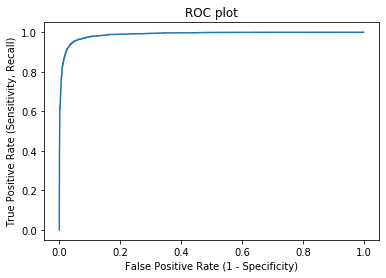

In [23]:
fpr, tpr, thresholds = roc_curve(labels, label_pred[:,1])
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot")

In [24]:
np.argmin(fpr > 0)
print(fpr[:20])

[0.         0.         0.         0.00019763 0.00019763 0.00039526
 0.00039526 0.00059289 0.00059289 0.00059289 0.00059289 0.00059289
 0.00059289 0.00079051 0.00079051 0.00098814 0.00098814 0.00118577
 0.00118577 0.0013834 ]


Text(0.5, 1.0, 'TRP/FPR = f(threshold)')

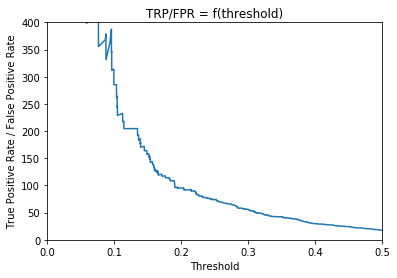

In [25]:
t_f = tpr[5:]/fpr[5:]
# plt.plot(range(len(t_f)), t_f)
plt.plot(np.flip(thresholds[5:]), t_f)
# plt.plot(thresholds[5:], t_f)
plt.xlabel("Threshold")
plt.ylabel("True Positive Rate / False Positive Rate")
plt.xlim([0,0.5])
plt.ylim([0,400])
plt.title("TRP/FPR = f(threshold)")

## Some False Positives examples: predicted objective, actual subjective

In [26]:
THRESHOLD = 0.8
all_lines_arr = np.array(all_lines)

In [27]:
TP = all_lines_arr[(label_pred[:,1] > THRESHOLD) & (labels == 1)]
FP = all_lines_arr[(label_pred[:,1] > THRESHOLD) & (labels == 0)]
TP_nb = len(TP)
FP_nb = len(FP)
TPR = TP_nb / len([labels == 1])
FPR = FP_nb / len([labels == 0])

predicted_P = FP_nb + TP_nb
if predicted_P != len(all_lines_arr[label_pred[:,1] > THRESHOLD]):
    print('Problem!')

print('FPR = {}'.format(FPR))
display(Markdown('### Removing {} sentences assumed objective'.format(predicted_P, )))
display(Markdown('### {0} ({1:.1%}) falsely predicted objective:'.format(FP_nb, FP_nb / predicted_P)))
for i, sent in enumerate(FP):
    print(i, sent)

FPR = 29.0


### Removing 3619 sentences assumed objective

### 29 (0.8%) falsely predicted objective:

0 who needs mind-bending drugs when they can see this , the final part of the 'qatsi' trilogy , directed by godfrey reggio , with music by philip glass ? 

1 no doubt the star and everyone else involved had their hearts in the right place . where their heads were is anyone's guess . 

2 an average coming-of-age tale elevated by the wholesome twist of a pesky mother interfering during her son's discovery of his homosexuality . 

3 weirdly , broomfield has compelling new material but he doesn't unveil it until the end , after endless scenes of him wheedling reluctant witnesses and pointing his camera through the smeared windshield of his rental car . 

4 the moviegoing equivalent of going to a dinner party and being forced to watch the host and hostess's home video of their baby's birth . 

5 once she lets her love depraved leads meet , [denis'] story becomes a hopeless , unsatisfying muddle

6 the sweetest thing is expressly for idiots who don't care what kind of sewage they shovel into

# Predicted subjective, actually objective

In [ ]:
diff = np.array(all_lines)[(label_pred == 1) & (labels == 0)]
print(len(diff))

for i, sent in enumerate(diff):
    print(i, sent)

# Grid search

In [ ]:
if True:
    grid = {
        'learning_rate': [.01, .05],
        'max_depth': [8, 16],
        'min_samples_leaf': [5],
        'max_features': ['sqrt'],
        'n_estimators': [300],
        'random_state': [0],
    }
else:  # TEST
    grid = {
    'learning_rate': [1],
    'max_depth': [2], 
    'min_samples_leaf': [2],
#     'max_features': ['sqrt', None],
    'n_estimators': [2],
    'random_state': [0]
}
    
# confusion_score = make_scorer(confusion_rmse, greater_is_better=False)

scorer = make_scorer(recall_score)
gbc_grid_cv = GridSearchCV(
    GradientBoostingClassifier(), 
    grid,
    cv=4,  # number of folds
    return_train_score=True,
    scoring=scorer,
    verbose=1, 
    n_jobs=-1)
gbc_grid_cv.fit(X_train, y_train)

In [ ]:
y_pred = gbc_grid_cv.predict(X_cv)

print(gbc_grid_cv.best_params_)
print(gbc_grid_cv.best_score_)
res_df = pd.DataFrame(gbc_grid_cv.cv_results_)
print('Used recall for scoring')
res_df

In [ ]:
# save the model
import pickle
pickle.dump(gbc, open('GBC_'+ str(N_TREES) +'_' + str(LEARN_RATE) 
                        +'_' + str(MIN_IN_LEAF) + '_20min.pkl', 'wb'))


# LSTM

In [42]:
print(len(all_lines))
all_lines[0]

10001


'called " an elegant documentary " by sundance and " eloquent and deeply moving " by the la times , toyo miyatake : infinite shades of gray is a penetrating portrait of this photographer\'s search for truth and beauty in a world of impermanence . \n'

### Find the max length of comments

In [51]:
from clean import Clean
clean = Clean()
cleaned_text = [clean.clean_text(sentence, remove_stop_words=False,remove_accents=False)
                for sentence in all_lines]
                

In [56]:
all_lines[3312:3322]

[autoreload of clean failed: Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/

['time stands still in more ways that one in clockstoppers , a sci-fi thriller as lazy as it is interminable . \n',
 'suffocated at conception by its munchausen-by-proxy mum . punish the vehicle to adore the star . \n',
 "poor ben bratt couldn't find stardom if mapquest emailed him point-to-point driving directions . \n",
 "the film is so bad it doesn't improve upon the experience of staring at a blank screen . \n",
 'all the performances are top notch and , once you get through the accents , all or nothing becomes an emotional , though still positive , wrench of a sit . \n',
 'what is unique about his secret life is that an assumption of intelligence , tolerance , and acceptance is already made , and thus the movie can focus on telling a compelling story . \n',
 'it is compelling to be exposed to a film as bluntly honest and yet as paradoxically ordinary as last orders . \n',
 "director roger michell does so many of the little things right that it's difficult not to cuss him out sever

In [57]:
cleaned_text[3312:3322]

['time stands still in more ways that one in clockstoppers   a sci-fi thriller as lazy as it is interminable  ',
 'suffocated at conception by its munchausen-by-proxy mum  punish the vehicle to adore the star  ',
 'poor ben bratt couldnt find stardom if mapquest emailed him point-to-point driving directions  ',
 'the film is so bad it doesnt improve upon the experience of staring at a blank screen  ',
 'all the performances are top notch and   once you get through the accents   all or nothing becomes an emotional   though still positive   wrench of a sit  ',
 'what is unique about his secret life is that an assumption of intelligence   tolerance   and acceptance is already made   and thus the movie can focus on telling a compelling story  ',
 'it is compelling to be exposed to a film as bluntly honest and yet as paradoxically ordinary as last orders  ',
 'director roger michell does so many of the little things right that its difficult not to cuss him out severely for bungling the big 

In [ ]:
if False:
    for i, text in enumerate(cleaned_text):
        if len(text.split()) > 60:
            print(i, text)

In [ ]:
if False:
    for i, text in enumerate(all_lines):
        if len(text.split()) > 60:
            print(i, text)

In [58]:
max([len(text.split()) for text in all_lines])

120

## Text to sequence

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(
    all_lines, labels, test_size=0.2, random_state=0)

### Define & run LSTM

In [ ]:
WORD_WINDOW = 50

import tensorflow as tf
keras = tf.keras
lstm = keras.Sequential()
lstm.add(keras.layers.LSTM(32, input_shape=(WORD_WINDOW, 1), return_sequences=True))
lstm.add(keras.layers.LSTM(32, return_sequences=False))
lstm.add(keras.layers.Dense(1, activation='linear'))
lstm.compile(optimizer='rmsprop',
              loss='mse')

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(
    all_lines, labels, test_size=0.2, random_state=0)

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10)

## J

In [ ]:
MAX_NB_WORDS = 500
max_review_length = 500
EMBEDDING_DIM = 160

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = MAX_NB_WORDS, 
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                      lower=True, split=' ', char_level=False, 
                      oov_token=None, document_count=0)

tokenizer.fit_on_texts(all_lines)

In [ ]:
config = tokenizer.get_config()

In [ ]:
config['word_counts']

In [ ]:
train_sequences = tokenizer.texts_to_sequences(df_tem3['review'])
test_sequences = tokenizer.texts_to_sequences(test['review'])

## TODO
### Use emotions vectors as input to model
### Use emotions to inspect input and re-label if needed
### See if remove highest frequency words?